In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

## Dataframe 생성

In [4]:
import pandas as pd
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [5]:
irisDf=spark.createDataFrame(iris)

In [6]:
irisDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



## features
spark 회귀분석을 하기 위해서 features 벡터 컬럼을 만들어야한다.

In [8]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = ["petal_length"],
                                   outputCol = 'features') ##형식을 vector로 반드시 맞추어야한다.

In [9]:
_irisDf=va.transform(irisDf) #하나만 하니까 파이프라인 할 필요 없음

In [11]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='petal_width')

In [12]:
lr_model=lr.fit(_irisDf)

In [15]:
print("Coefficients: {}".format(lr_model.coefficients))
print("Intercept: {:.3f}".format(lr_model.intercept)) #y절편

Coefficients: [0.41641913228540195]
Intercept: -0.367


---
##

C:\Users\user\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


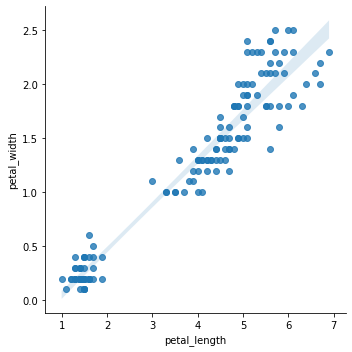

In [18]:
#pandas 컬럼명 넣어야함
import seaborn as sns
sns.lmplot(x="petal_length",y="petal_width",data=iris)

C:\Users\user\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


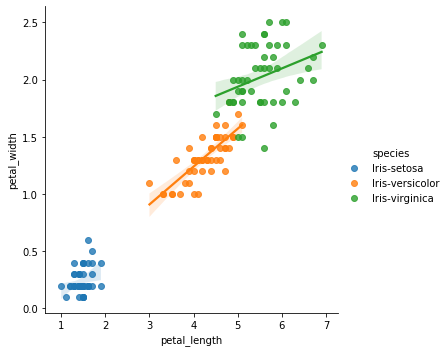

In [19]:
import seaborn as sns
sns.lmplot(x="petal_length",y="petal_width",data=iris,hue='species')

##

##